In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from MLCode.KCrossVal import kFoldCross
from MLCode.utils import load_shuffled_cup, np_cup_TR, plot_NN_TR_VAL
import torch
from torch import nn
import itertools
from MLCode.SVM import load_results, save_results
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
import time

In [16]:
df = load_shuffled_cup()
X_dev, Y_dev = np_cup_TR(df, test=False)

kernel='rbf'
C_list=[0.1,1,10,100,1000]
gamma_list=[0.0001,0.001,0.01,0.1,1]
epsilon_list=[0.001]
HP_list = itertools.product(gamma_list, C_list, epsilon_list)
results = []
for HyperParam in HP_list:
    gamma_s, C_s, epsilon_s = HyperParam

    SVR_model=SVR(kernel=kernel,gamma=gamma_s,C=C_s,epsilon=epsilon_s,cache_size=1200)
    mor=MultiOutputRegressor(SVR_model, n_jobs=2)

    res = kFoldCross(mor.fit, mor.predict, X_dev, Y_dev, 5)
    res = C_s, epsilon_s, gamma_s, res[0], res[1], res[2]
    results.append(res)

columns=['C', 'epsilon', 'gamma', 'MEE_mean', 'MEE_std', 'seconds']
df = pd.DataFrame(results, columns=columns)

# save results
save_results(df, kernel)
# load all saved results
df = load_results(kernel)

In [46]:
# load all saved results
df = load_results(kernel)
df.sort_values(by=['MEE_mean']).head()

,C,epsilon,gamma,MEE_mean,MEE_std,seconds
17,10.0,0.001,0.10,2.958995,0.171739,0.121038
18,100.0,0.001,0.10,3.123882,0.167362,0.128947
16,1.0,0.001,0.10,3.206170,0.181968,0.119483
14,1000.0,0.001,0.01,3.233564,0.146512,0.123410
13,100.0,0.001,0.01,3.353219,0.122090,0.113116


Epsilon:
0.001


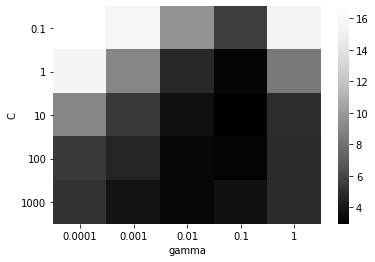

In [35]:
df2 = df
df2 = df2.sort_values(by=['C', 'gamma'])
array = df2['MEE_mean'].to_numpy()
array = array.reshape(-1, 5)
ax = sns.heatmap(array, xticklabels=gamma_list, yticklabels=C_list,cmap='Greys_r')
plt.yticks(rotation=0)
ax.set_xlabel('gamma')
ax.set_ylabel('C')

print('Epsilon:')
print(epsilon_list[0])

In [51]:
kernel='poly'
# C=1000 bad performance and takes too much time
C_list=[0.1,1,10,100]
epsilon_list = [0.01]
# epsilon_list=[0.001,0.1,10]
coeff_list=[0.5]
degree_list = [1,2,3,4]
HP_list = itertools.product(C_list, epsilon_list, degree_list, coeff_list)
results = []
for HyperParam in HP_list:
    C, epsilon, degree, coeff = HyperParam

    SVR_model=SVR(
        kernel='poly',degree=degree,coef0=coeff,C=C,epsilon=epsilon,cache_size=1200
    )
    mor=MultiOutputRegressor(SVR_model, n_jobs=2)

    start = time.time()
    res = kFoldCross(mor.fit, mor.predict, X_dev, Y_dev, 5)
    res = C, epsilon, degree, coeff, res[0], res[1], time.time()-start
    results.append(res)

columns=['C', 'epsilon', 'degree', 'coeff', 'MEE_mean', 'MEE_std', 'seconds']
df = pd.DataFrame(results, columns=columns)

# save results
save_results(df, kernel)


In [52]:
# load all saved results
df = load_results(kernel)
df.sort_values(by=['MEE_mean'])

,C,epsilon,degree,coeff,MEE_mean,MEE_std,seconds
14,10.0,0.01,4,0.5,3.224906,0.146358,1.888648
13,1.0,0.01,4,0.5,3.269612,0.088946,0.559456
5,1.0,0.01,3,1.0,3.315514,0.105491,0.553639
8,10.0,0.01,3,1.0,3.415459,0.142616,1.531702
11,100.0,0.01,3,1.0,3.646062,0.133492,15.966504
4,1.0,0.01,2,1.0,3.697158,0.082689,0.510802
2,0.1,0.01,3,1.0,3.729148,0.087390,0.471204
7,10.0,0.01,2,1.0,3.737890,0.088445,0.768113
10,100.0,0.01,2,1.0,3.786858,0.093023,4.218110
15,100.0,0.01,4,0.5,3.854337,0.177258,19.251410


Epsilon:
0.01


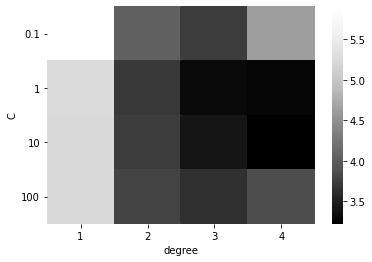

In [58]:
df2 = df
df2 = df2.sort_values(by=['C', 'degree'])
array = df2['MEE_mean'].to_numpy()
array = array.reshape(-1, 4)
ax = sns.heatmap(array, xticklabels=degree_list, yticklabels=C_list,cmap='Greys_r')
plt.yticks(rotation=0)
ax.set_xlabel('degree')
ax.set_ylabel('C')

print('Epsilon:')
print(epsilon_list[0])